Data extraction

In [31]:
%matplotlib inline
from obspy import read
import matplotlib.pyplot as plt
#import matplotlib
#matplotlib.use('Qt5Agg')
import numpy as np
import time
import os
import shutil

#sac_file = input("which file?\n")
source = "N"
station = "AAKH"
directions = ["E", "N", "U"]
stations = dict.fromkeys(directions)
for d in directions:
    path = "data/" + source + "." + station + "." + d + ".SAC"
    stations[d] = read(path, debug_headers=True)



Plotting for one dimension

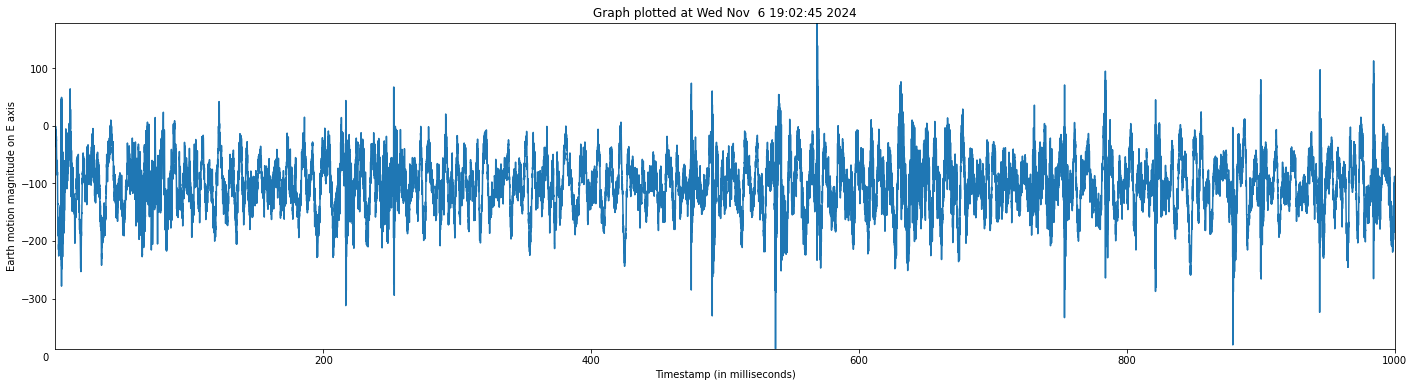

In [ ]:
direction = "E"

timestamps = []
magnitude = []

count = 0
for i in stations[direction][0]:
    count += 1
    #print(f"{i} {count}")
    timestamps.append(round(count / 30, 3))
    magnitude.append(i)

# increase plot length
plt.figure(figsize=(24, 6))

plt.xlabel("Timestamp (in milliseconds)")
plt.ylabel(f"Earth motion magnitude on {direction} axis")

# axis starting on 0
plt.margins(x=0, y=0)

# drawing 0
plt.text(-10, min(magnitude) - 20, "0")

plt.title("Graph plotted at " + str(time.ctime(time.time())))
plt.plot(timestamps, magnitude)
plt.show()

Plot for three dimensions

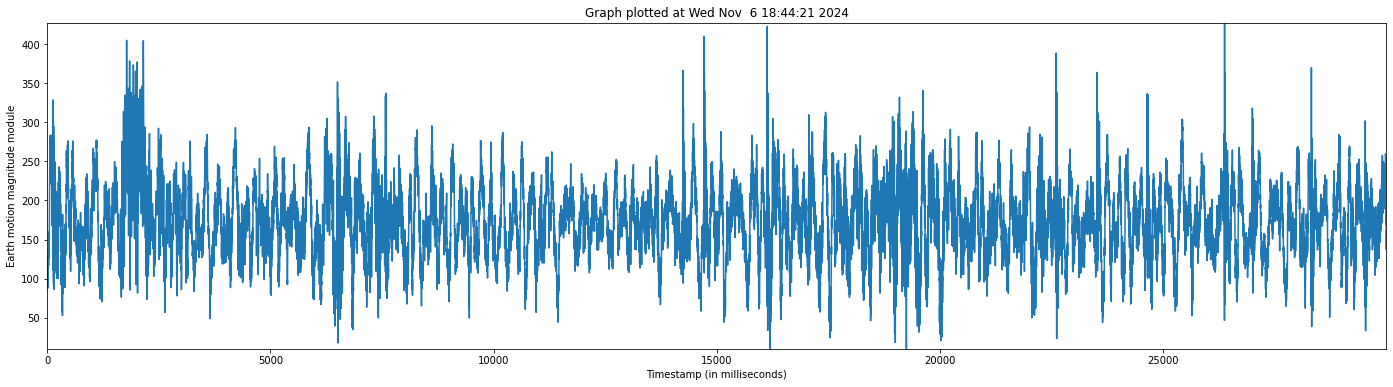

In [ ]:
from math import sqrt

timestamps = []
resultants = []

# all stations have the same length
for i in range(len(stations["E"][0])):
    r = 0
    for d in directions:
        r += stations[d][0][i] ** 2
    r = sqrt(r)
    resultants.append(r)
    timestamps.append(i)

plt.figure(figsize=(24, 6))
plt.xlabel("Timestamp (in milliseconds)")
plt.ylabel("Earth motion magnitude module")
plt.margins(x=0, y=0)
plt.title("Graph plotted at " + str(time.ctime(time.time())))
plt.plot(timestamps, resultants)
plt.show()

Save Plot

In [ ]:
#plt.show()
plot_file = "plot.png"
prev_file = "prev.png"
if os.path.exists(plot_file):
    shutil.copy(plot_file, prev_file)
plt.savefig("plot.png")